In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

In [2]:
def to_one_hot(y):
    n_col = np.amax(y) + 1
    binarized = np.zeros((len(y), n_col))
    for i in range(len(y)):
        binarized[i, y[i]] = 1
    return binarized

In [3]:
def from_one_hot(y):
    arr = np.zeros((len(y), 1))

    for i in range(len(y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j + 1
    return arr

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [5]:
def normalize(x, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(x, order, axis))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
iris_data = pd.read_csv('Iris.csv')
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica',
                              'Iris-versicolor'], [0, 1, 2], inplace=True)

In [9]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
x

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [10]:
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33,
                                                    random_state=42)

In [12]:
def training_w_params(rate, nlc, epochs):

    w0 = 2 * np.random.random((nlc[0], nlc[1])) - 1
    w1 = 2 * np.random.random((nlc[1], nlc[2])) - 1

    errors = []
    accuracy_seq = []

    for i in range(epochs):

        layer0 = x_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * rate
        w0 += layer0.T.dot(layer1_delta) * rate

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        accuracy_seq.append(accuracy)

    ep = np.linspace(0, epochs, epochs)

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.grid('On')
    plt.xlabel('количество эпох')
    plt.ylabel('ошибка')
    plt.plot(ep[0:len(errors)], errors,'-b')

    plt.subplot(1, 2, 2)
    plt.grid('On')
    plt.xlabel('количество эпох')
    plt.ylabel('точность')
    plt.plot(ep[0:len(accuracy_seq)], accuracy_seq,'-r')

    return round(accuracy_seq[-1], 2)

,learning rate,neurons layers composition,epochs,accuracy
0,0.001,"[4, 5, 3]",10000,76.12


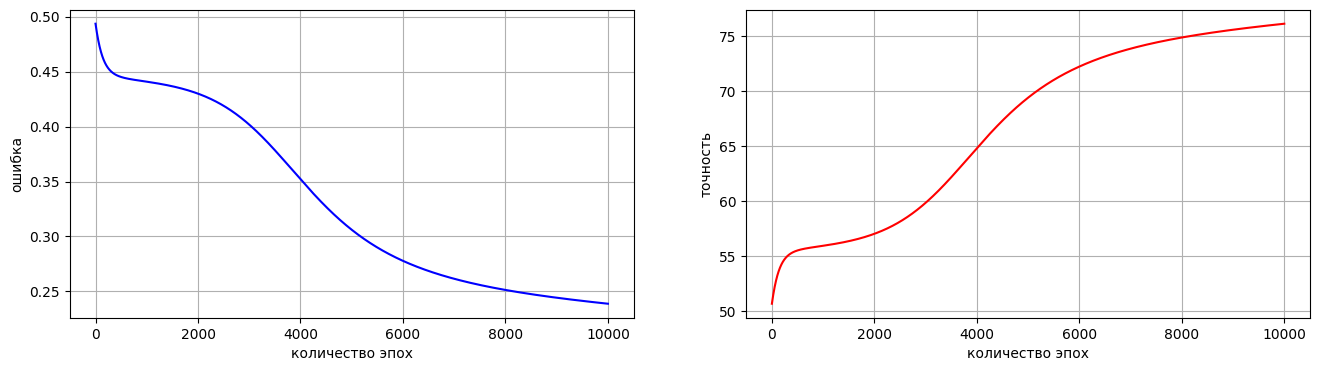

In [13]:
# создаем датафрейм, в который будем записывать изменение параметров нейросети
# и изменение accuracy в зависимости от них. первую строку мы получаем из
# примера, разобранного на вебинаре
rate = .001
nlc = [4, 5, 3]
epochs = 10000
accuracy = training_w_params(rate, nlc, epochs)
df = pd.DataFrame({'learning rate': rate, 'neurons layers composition':
                   f'{nlc}', 'epochs': epochs, 'accuracy': accuracy}, index=[0])
df

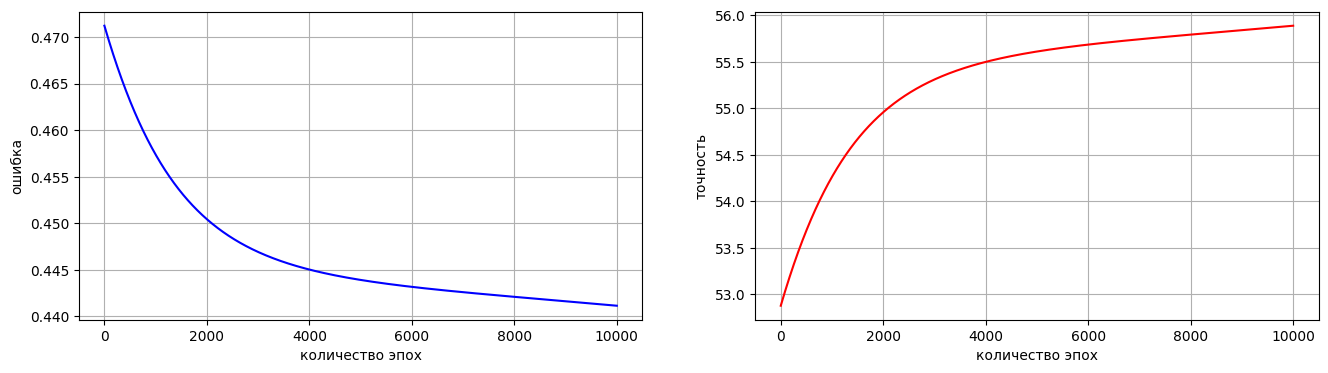

In [14]:
rate = .0001
nlc = [4, 5, 3]
epochs = 10000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

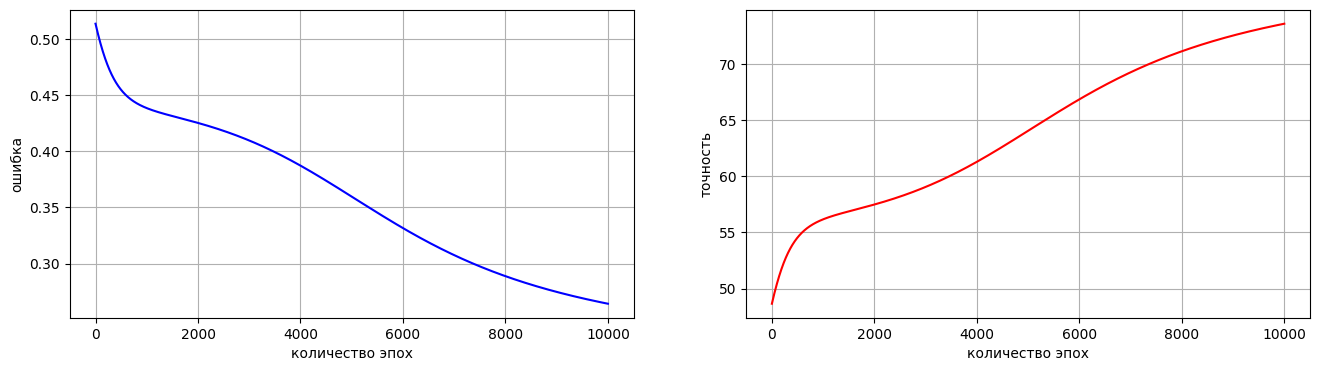

In [15]:
rate = .0005
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

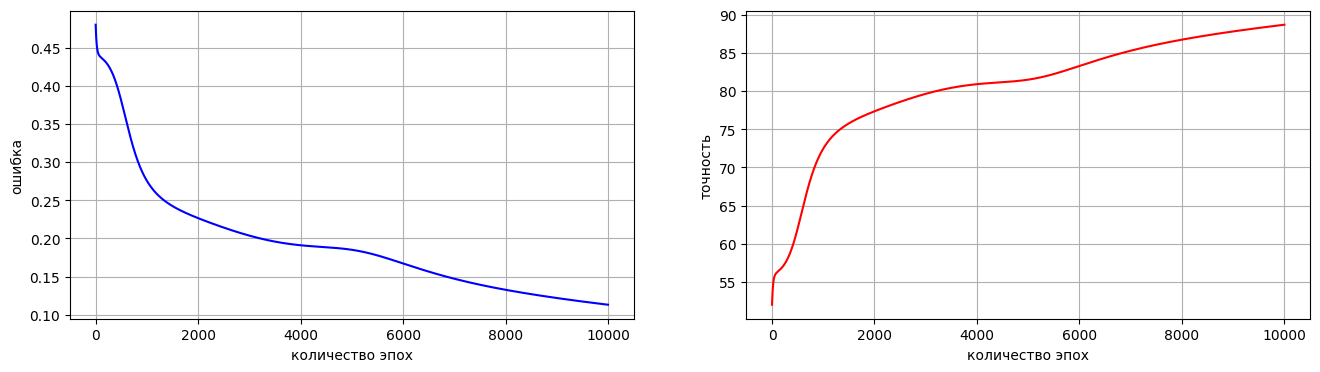

In [16]:
rate = .005
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

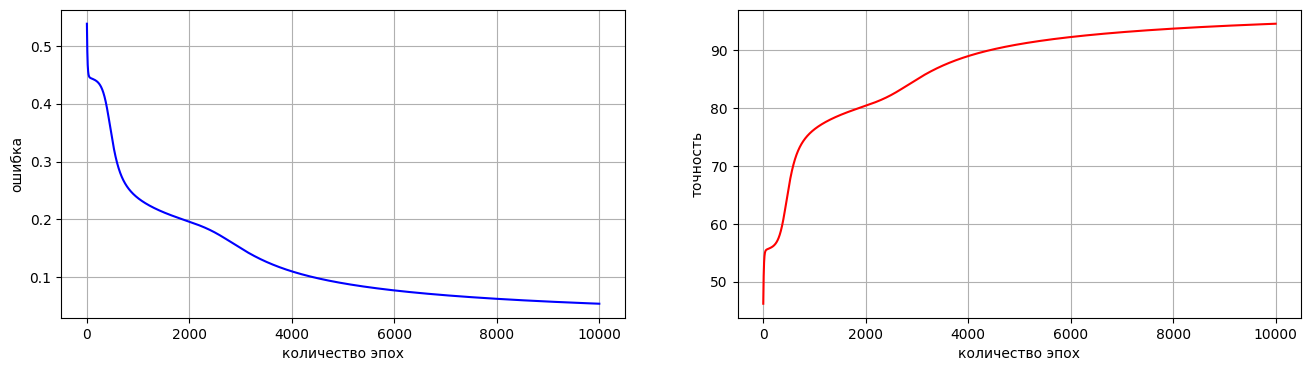

In [17]:
rate = .01
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

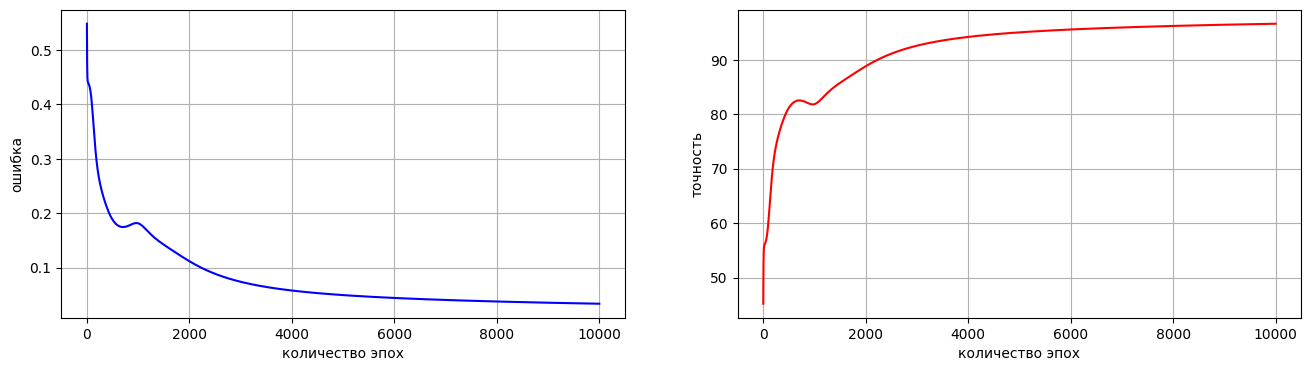

In [18]:
rate = .03
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

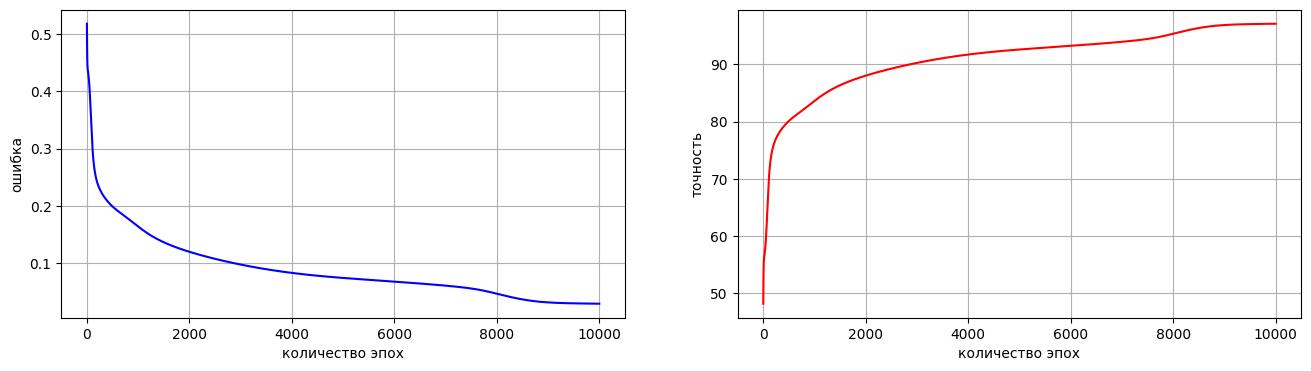

In [19]:
rate = .04
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

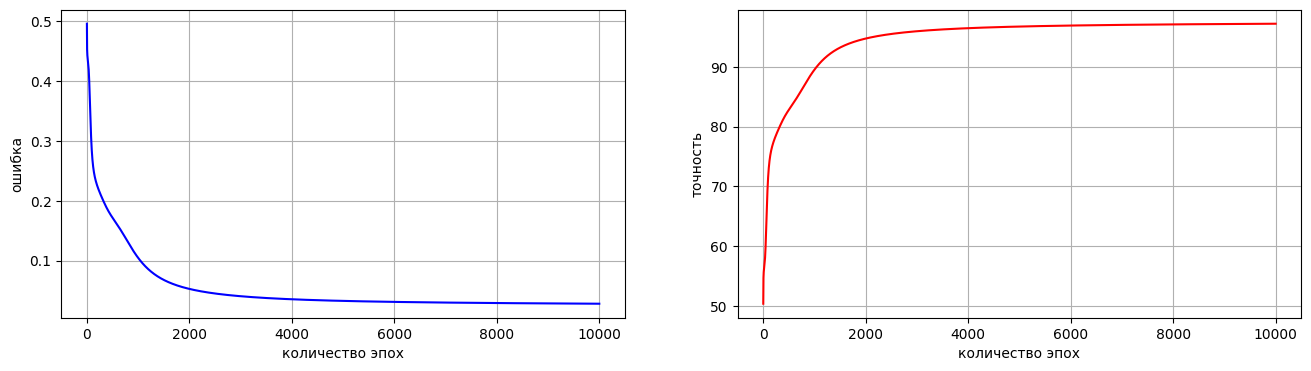

In [20]:
rate = .05
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

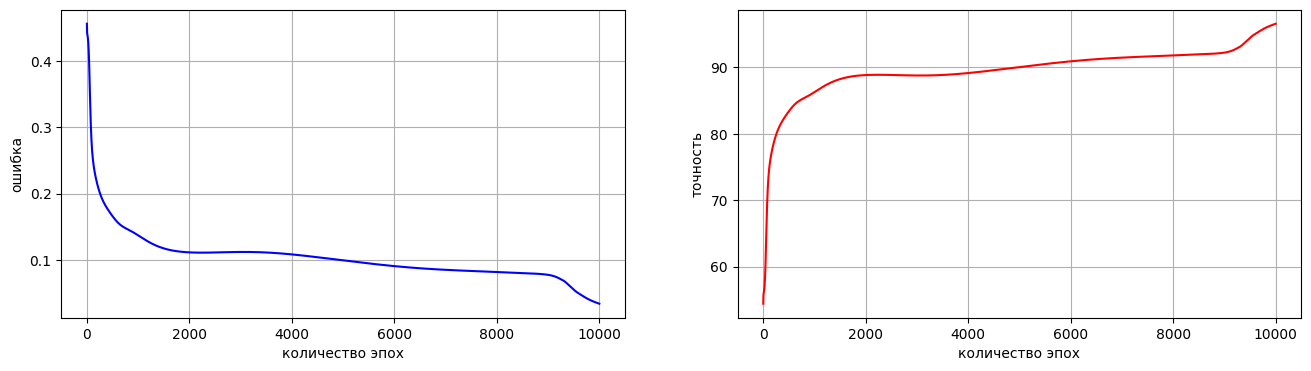

In [21]:
rate = .06
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

In [22]:
df

,learning rate,neurons layers composition,epochs,accuracy
0,0.0010,"[4, 5, 3]",10000,76.12
1,0.0001,"[4, 5, 3]",10000,55.89
2,0.0005,"[4, 5, 3]",10000,73.58
3,0.0050,"[4, 5, 3]",10000,88.68
4,0.0100,"[4, 5, 3]",10000,94.56
5,0.0300,"[4, 5, 3]",10000,96.62
6,0.0400,"[4, 5, 3]",10000,97.13
7,0.0500,"[4, 5, 3]",10000,97.20
8,0.0600,"[4, 5, 3]",10000,96.59




Самую лучшую метрику показал параметр learning rate, равный 0.05. Возьмем его для дальнейшего исследования. При скорости обучения, равной 0.0001, accaracy чуть выше 50, но с ростом этого параметра увеличивается и accuracy! Около единицы accuracy начинает снижаться, потому что, очевидно, проскакивает глобальный минимум.


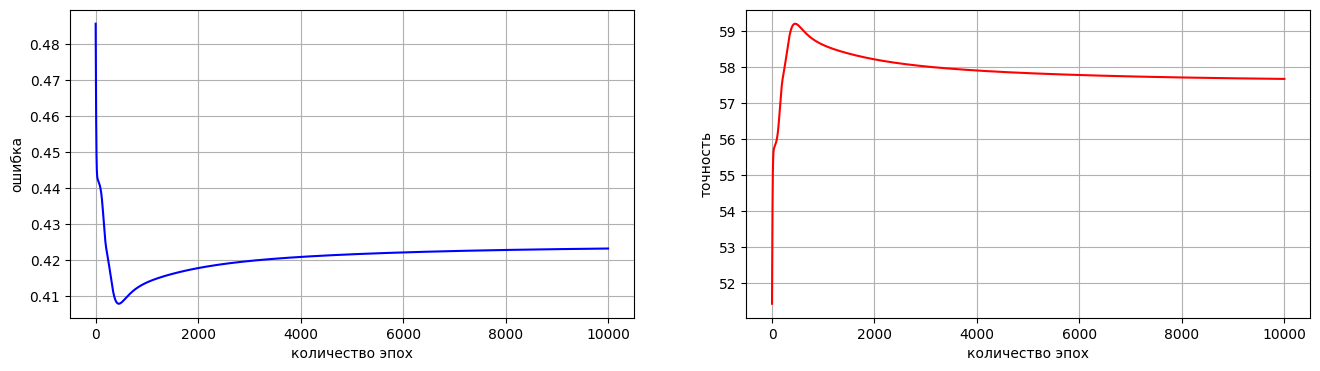

In [23]:
rate = .05
nlc = [4, 1, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

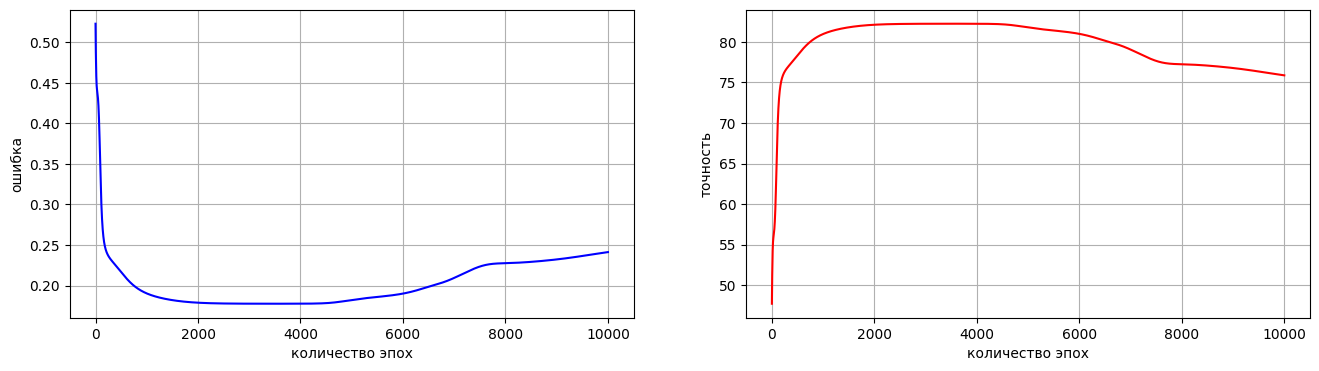

In [24]:
nlc = [4, 2, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

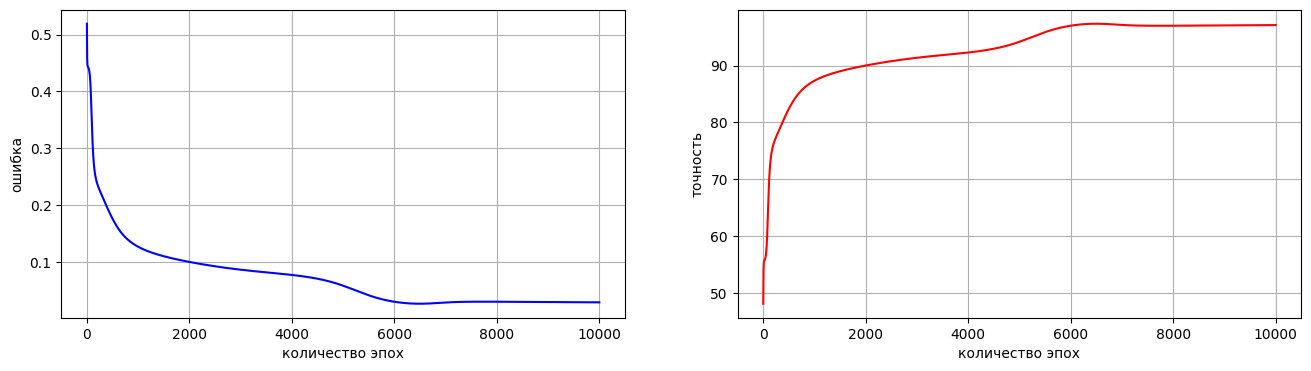

In [25]:
nlc = [4, 3, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

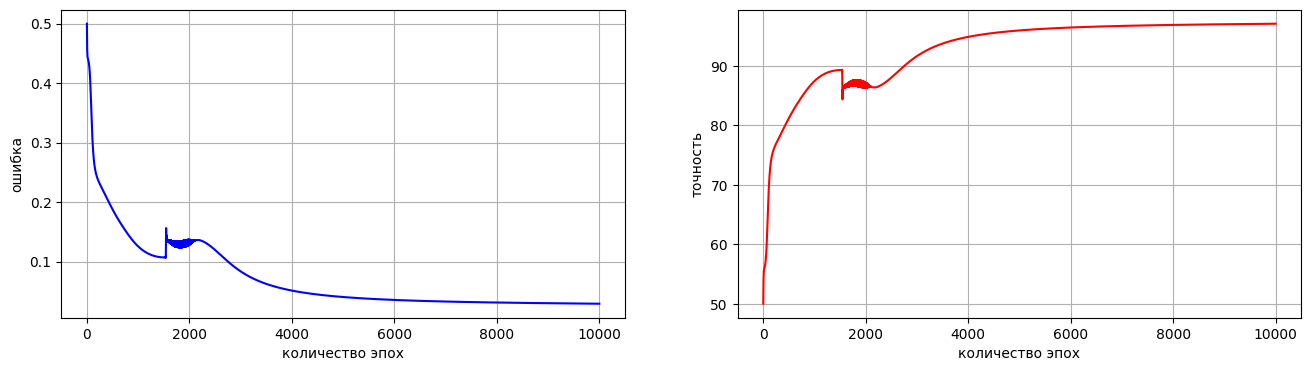

In [26]:
nlc = [4, 4, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

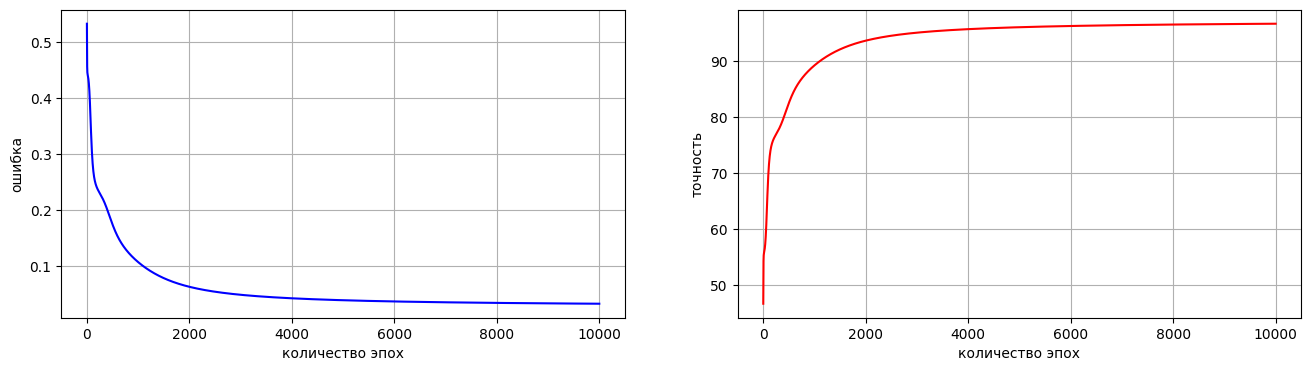

In [27]:
nlc = [4, 5, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

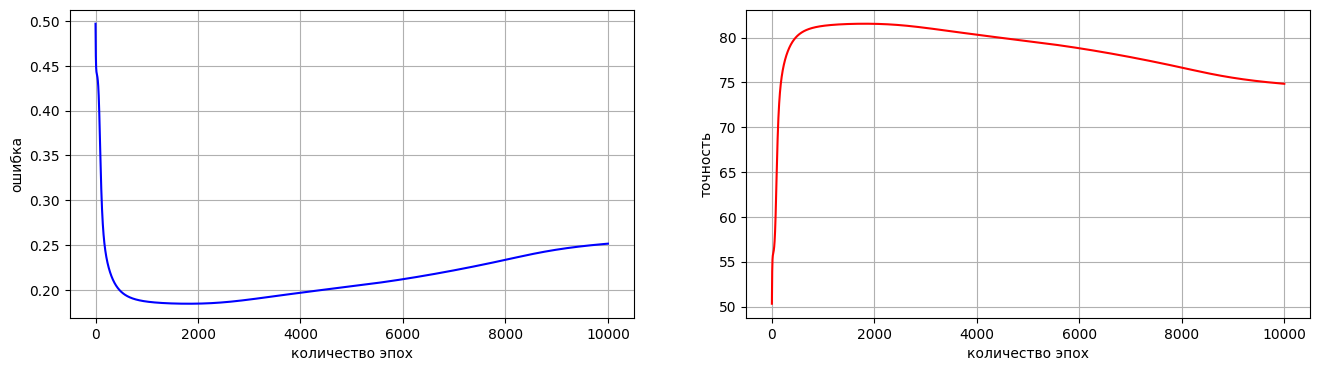

In [28]:
nlc = [4, 2, 3, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

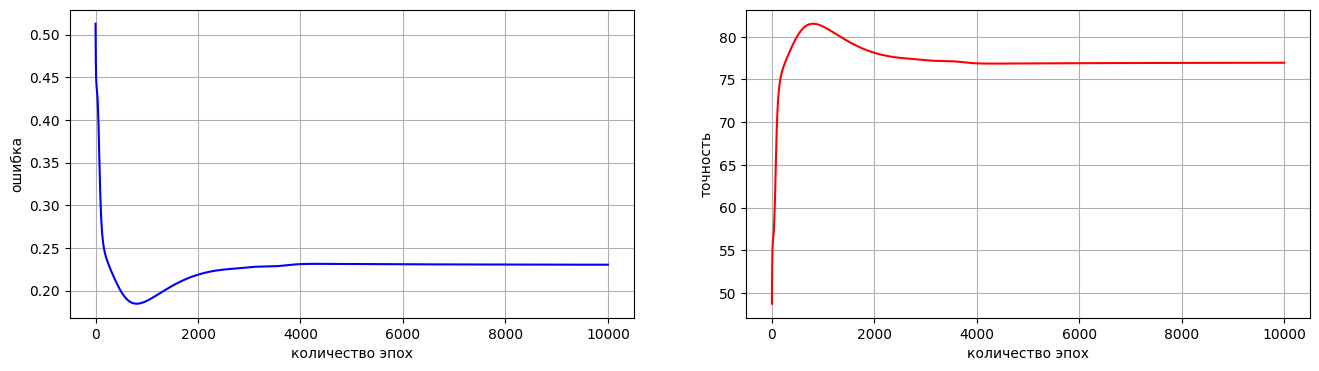

In [29]:
nlc = [4, 3, 3, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

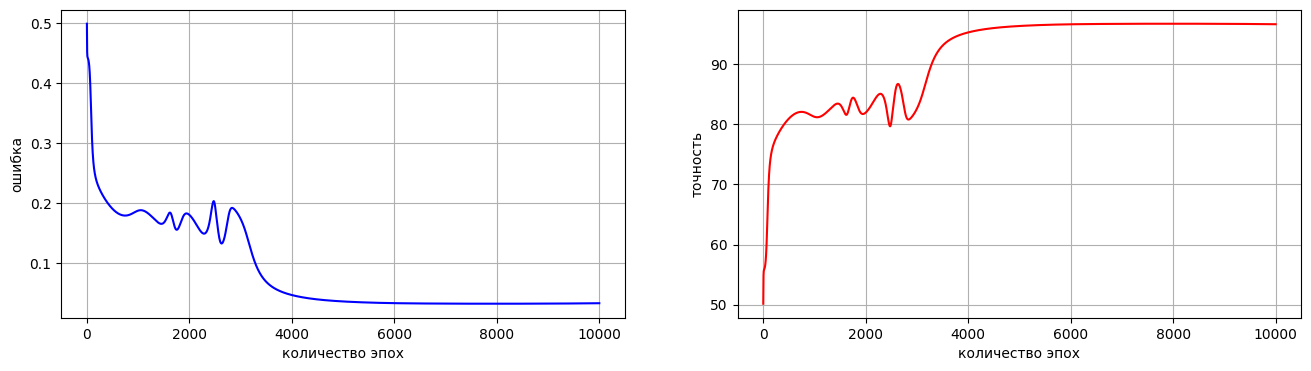

In [30]:
nlc = [4, 3, 3, 3, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

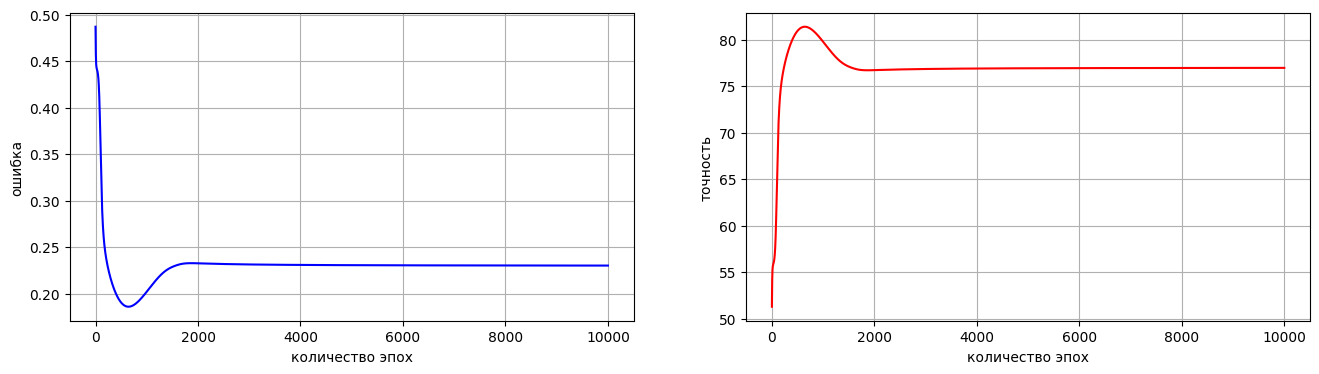

In [31]:
nlc = [4, 3, 3, 3, 3, 3]
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

In [32]:
df

,learning rate,neurons layers composition,epochs,accuracy
0,0.0010,"[4, 5, 3]",10000,76.12
1,0.0001,"[4, 5, 3]",10000,55.89
2,0.0005,"[4, 5, 3]",10000,73.58
3,0.0050,"[4, 5, 3]",10000,88.68
4,0.0100,"[4, 5, 3]",10000,94.56
5,0.0300,"[4, 5, 3]",10000,96.62
6,0.0400,"[4, 5, 3]",10000,97.13
7,0.0500,"[4, 5, 3]",10000,97.20
8,0.0600,"[4, 5, 3]",10000,96.59
9,0.0500,"[4, 1, 3]",10000,57.67


Теперь мы изменили количество нейронов в скрытом слое. Начали с одного - сетка делает слабенькие предсказания, accuracy чуть больше 50. Однако уже три нейрона в скрытом слое дают достаточно высокую accuracy. Даже добавление еще нескольких слоев ее не повышает (по нашему мнению, это происходит потому, что слои не добавляют никакой новой информации, а дублируют уже имеющуюся, например, стоило нам добавить в один из скрытых слоев лишь два нейрона - и arruracy уменьшилась очень сильно), а иногда и значительно снижает. Оставим один скрытый слой из трех нейронов.

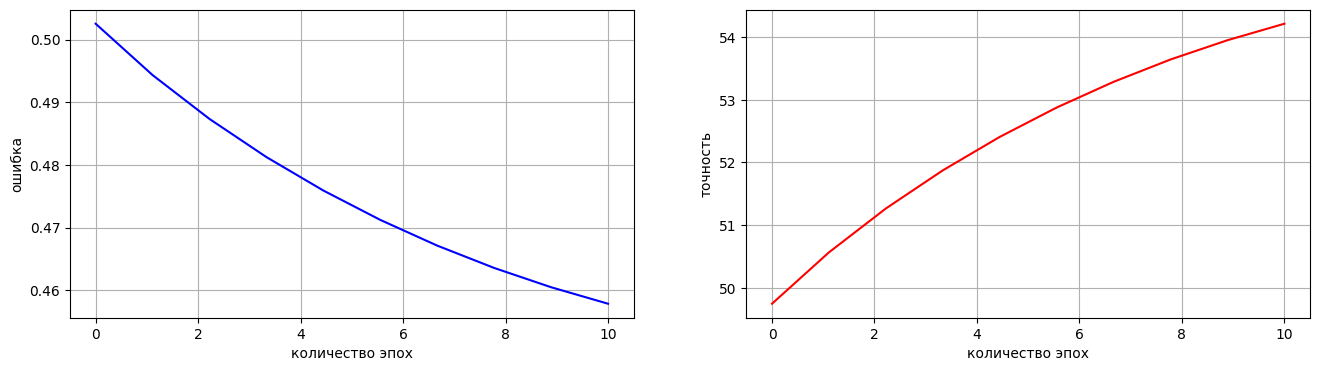

In [33]:
nlc = [4, 3, 3]
epochs = 10
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

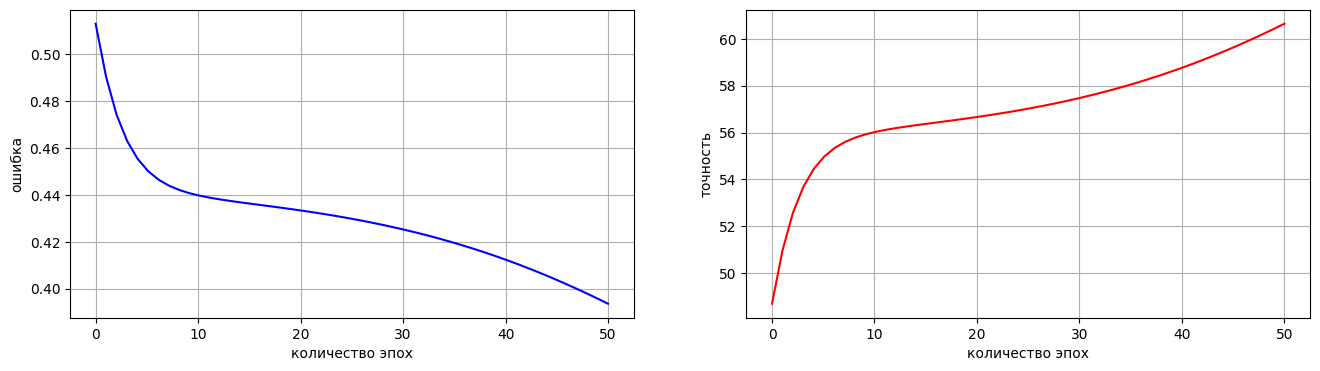

In [34]:
epochs = 50
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

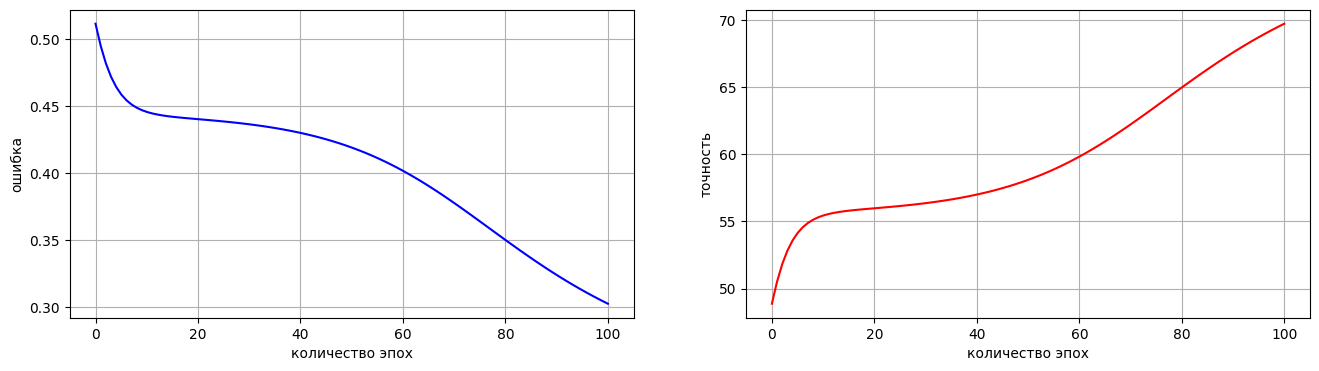

In [35]:
epochs = 100
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

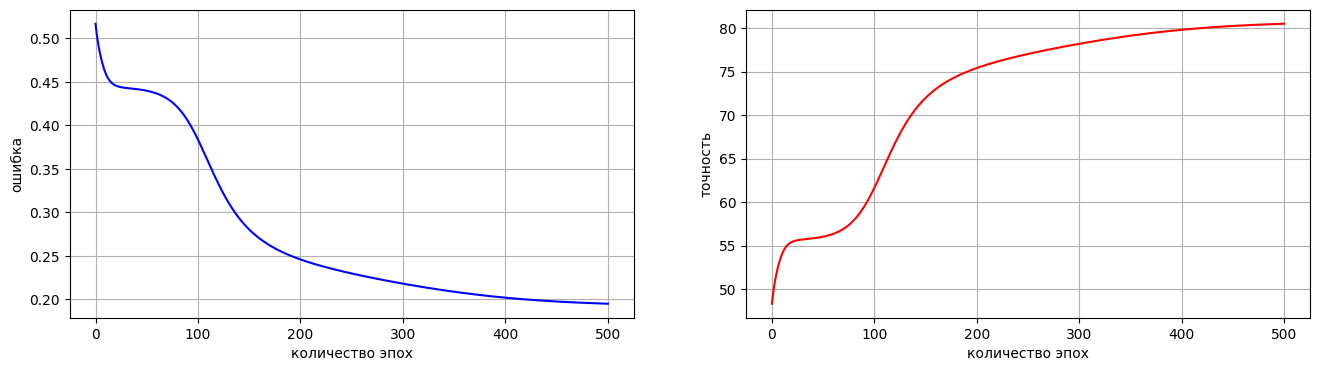

In [36]:
epochs = 500
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

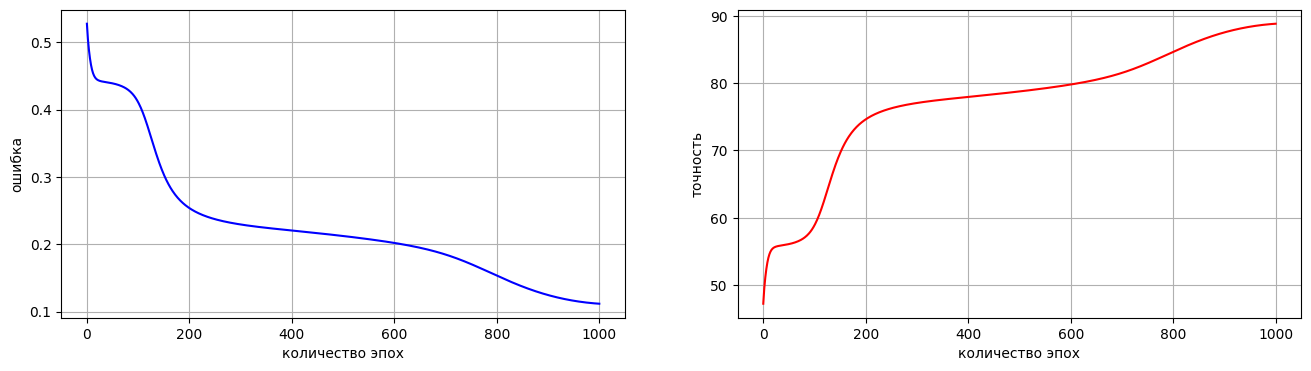

In [37]:
epochs = 1000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

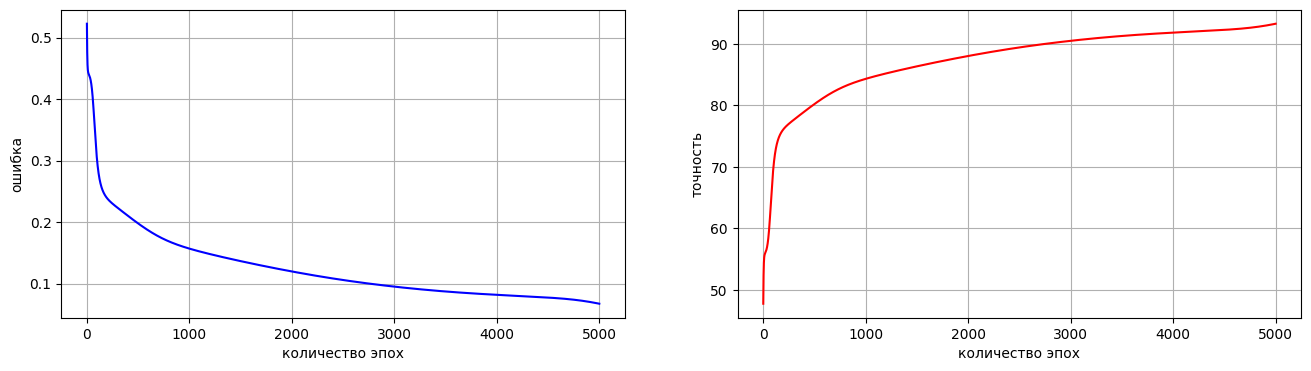

In [38]:
epochs = 5000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

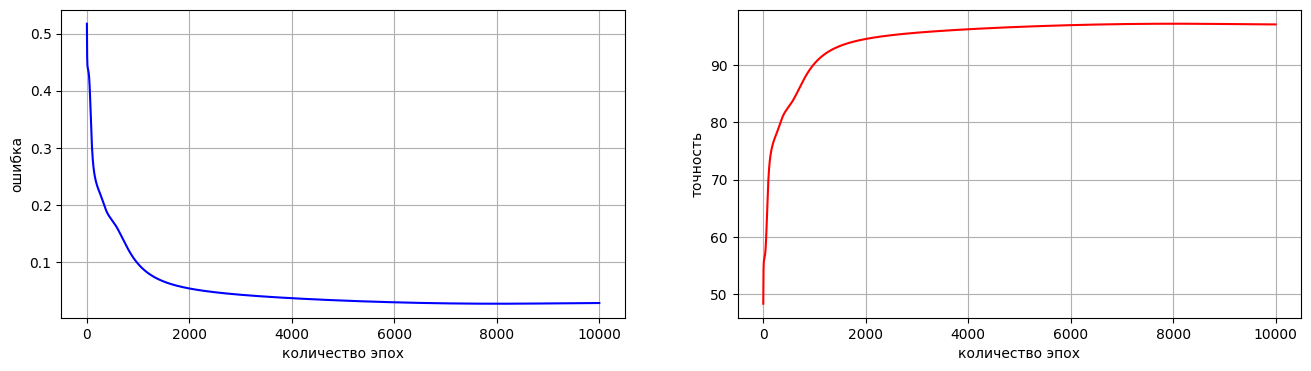

In [39]:
epochs = 10000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

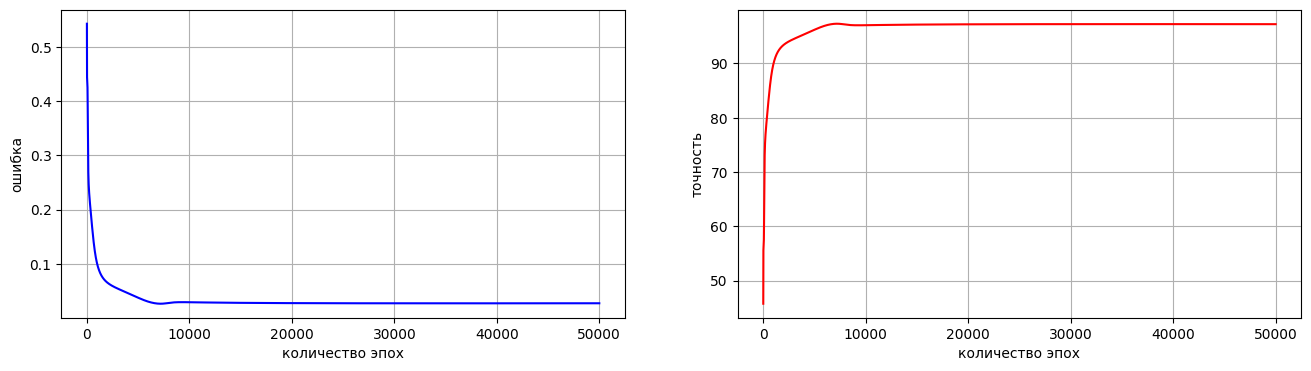

In [40]:
epochs = 50000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

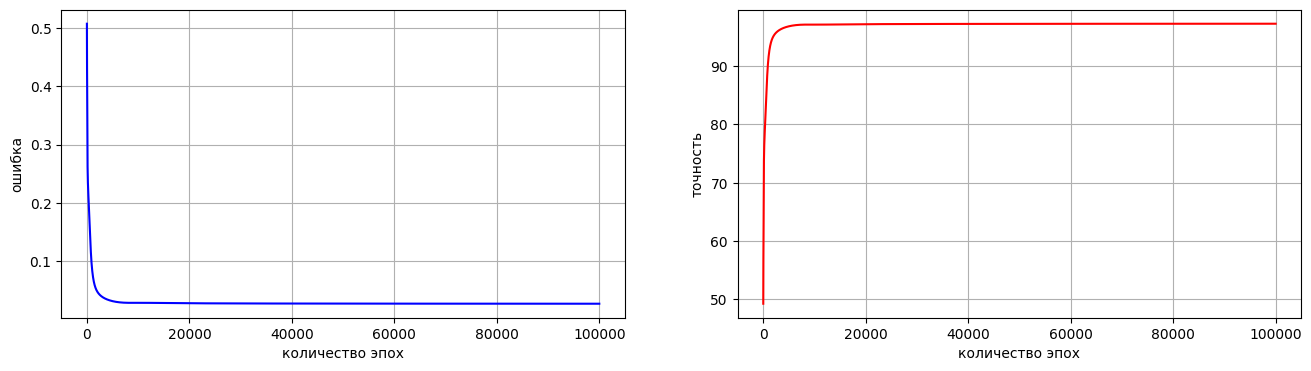

In [41]:
epochs = 100000
accuracy = round(training_w_params(rate, nlc, epochs), 2)
df = df._append({'learning rate': rate, 'neurons layers composition': nlc,
                 'epochs': epochs, 'accuracy': accuracy}, ignore_index=True)

In [42]:
df

,learning rate,neurons layers composition,epochs,accuracy
0,0.0010,"[4, 5, 3]",10000,76.12
1,0.0001,"[4, 5, 3]",10000,55.89
2,0.0005,"[4, 5, 3]",10000,73.58
3,0.0050,"[4, 5, 3]",10000,88.68
4,0.0100,"[4, 5, 3]",10000,94.56
5,0.0300,"[4, 5, 3]",10000,96.62
6,0.0400,"[4, 5, 3]",10000,97.13
7,0.0500,"[4, 5, 3]",10000,97.20
8,0.0600,"[4, 5, 3]",10000,96.59
9,0.0500,"[4, 1, 3]",10000,57.67


На наших данных чем больше эпох, тем лучше. Однако мы получили достаточно хорошую метрику уже на 100 000 эпох. Мы запускали 5 000 000 эпох, но метрика меняется незначительно, а ждать долго. Поэтому мы решили остановиться на 100 000.